In [7]:
import sys, os
sys.path.append(os.path.abspath("../src"))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_preprocessing import load_and_clean_trader_data, load_and_clean_sentiment_data, merge_datasets

plt.style.use("seaborn-v0_8-darkgrid")

In [12]:
trader_path = r"C:\Users\nisha\Downloads\historical_data.csv"
sentiment_path = r"C:\Users\nisha\Downloads\fear_greed_index.csv"

trader_df = load_and_clean_trader_data(trader_path)
sentiment_df = load_and_clean_sentiment_data(sentiment_path)

# Ensure the 'Date' column in both dataframes is of the same type before merging
trader_df['Date'] = pd.to_datetime(trader_df['Date'], errors='coerce')
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'], errors='coerce')

# Merge the datasets
merged_df = merge_datasets(trader_df, sentiment_df)

print("Columns:", merged_df.columns.tolist())
print("Shape:", merged_df.shape)
merged_df.head()

Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Date', 'timestamp', 'value', 'classification']
Shape: (211224, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed


In [3]:
# --- Basic Stats and Distributions ---

print("Unique Sentiments:", sentiment_df['classification'].unique())
print("\nValue Counts:\n", sentiment_df['classification'].value_counts())

print("\nSummary Stats for Sentiment Value:\n")
display(sentiment_df['value'].describe())

Unique Sentiments: ['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']

Value Counts:
 classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

Summary Stats for Sentiment Value:



count    2644.000000
mean       46.981089
std        21.827680
min         5.000000
25%        28.000000
50%        46.000000
75%        66.000000
max        95.000000
Name: value, dtype: float64

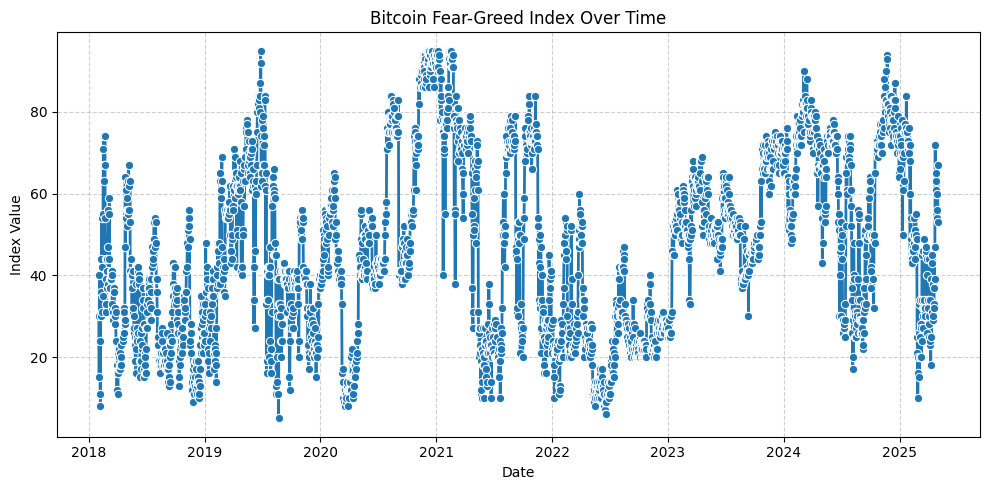

In [4]:
# --- Plot Fear-Greed Trend ---

plot_sentiment_trend(sentiment_df)

C:\Users\nisha\AppData\Local\Temp\ipykernel_12076\3496879003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="classification", data=merged_df, palette="coolwarm")


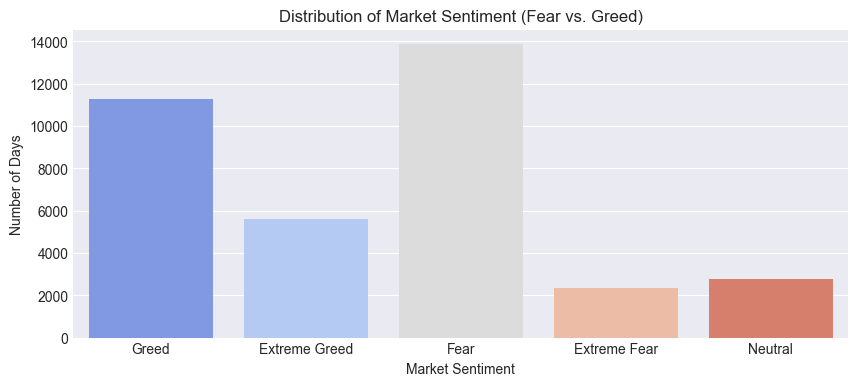

In [14]:
plt.figure(figsize=(10, 4))
sns.countplot(x="classification", data=merged_df, palette="coolwarm")
plt.title("Distribution of Market Sentiment (Fear vs. Greed)")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Days")
plt.show()

In [5]:
# --- Sentiment transitions (Fear→Greed, etc.) ---

sentiment_df['shift'] = sentiment_df['classification'].shift(1)
sentiment_df['change'] = sentiment_df.apply(
    lambda x: f"{x['shift']}→{x['classification']}" if x['shift'] != x['classification'] else None, axis=1
)
transitions = sentiment_df['change'].value_counts().head(10)

print("=== Top Sentiment Transitions ===\n")
print(transitions)

=== Top Sentiment Transitions ===

change
Fear→Extreme Fear      88
Extreme Fear→Fear      88
Neutral→Greed          71
Fear→Neutral           70
Neutral→Fear           68
Greed→Neutral          67
Greed→Extreme Greed    54
Extreme Greed→Greed    52
Greed→Fear             12
Fear→Greed             12
Name: count, dtype: int64


C:\Users\nisha\AppData\Local\Temp\ipykernel_12076\838933770.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sentiment", y="Number of Trades", data=trades_by_sentiment, palette="viridis")


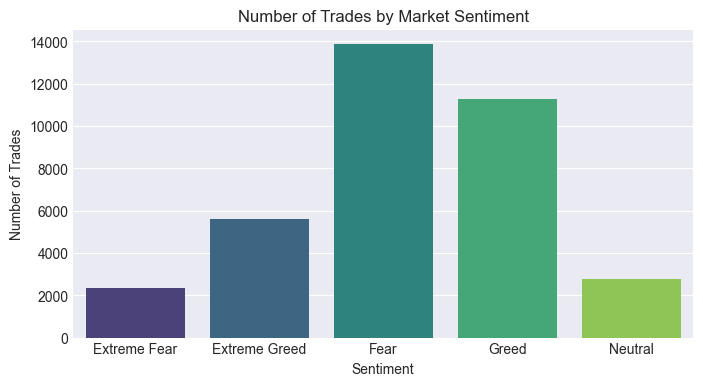

In [17]:
trades_by_sentiment = (
    merged_df.groupby("classification")["Account"].count().reset_index()
)
trades_by_sentiment.columns = ["Sentiment", "Number of Trades"]

plt.figure(figsize=(8, 4))
sns.barplot(x="Sentiment", y="Number of Trades", data=trades_by_sentiment, palette="viridis")
plt.title("Number of Trades by Market Sentiment")
plt.show()

C:\Users\nisha\AppData\Local\Temp\ipykernel_12076\3600235864.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="classification", y="Closed PnL", data=pnl_sentiment, palette="magma")


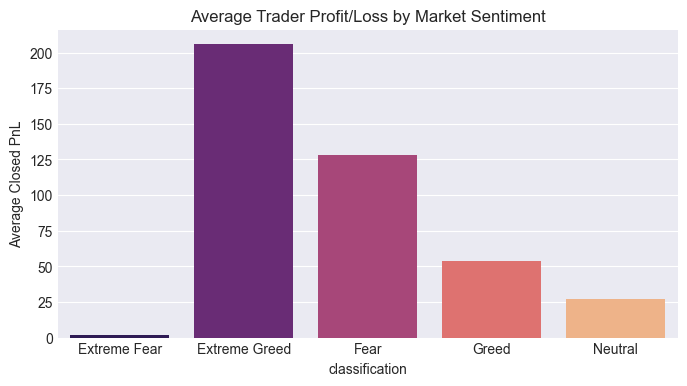

In [21]:
pnl_sentiment = merged_df.groupby("classification")["Closed PnL"].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x="classification", y="Closed PnL", data=pnl_sentiment, palette="magma")
plt.title("Average Trader Profit/Loss by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.show()

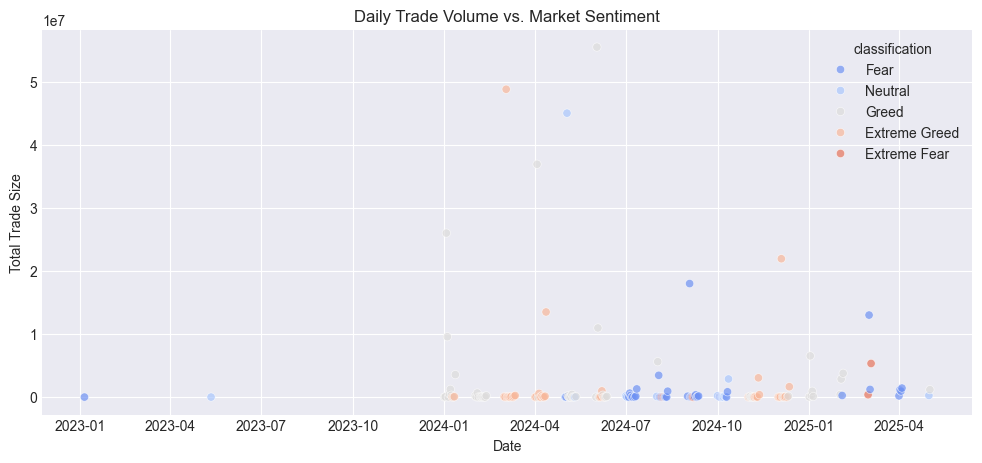

In [25]:
daily_trades = merged_df.groupby("Date").agg({
    "Size Tokens": "sum",
    "classification": "first"
}).reset_index()

plt.figure(figsize=(12, 5))
sns.scatterplot(
    x="Date", y="Size Tokens", hue="classification",
    data=daily_trades, palette="coolwarm", alpha=0.7
)
plt.title("Daily Trade Volume vs. Market Sentiment")
plt.ylabel("Total Trade Size")
plt.show()

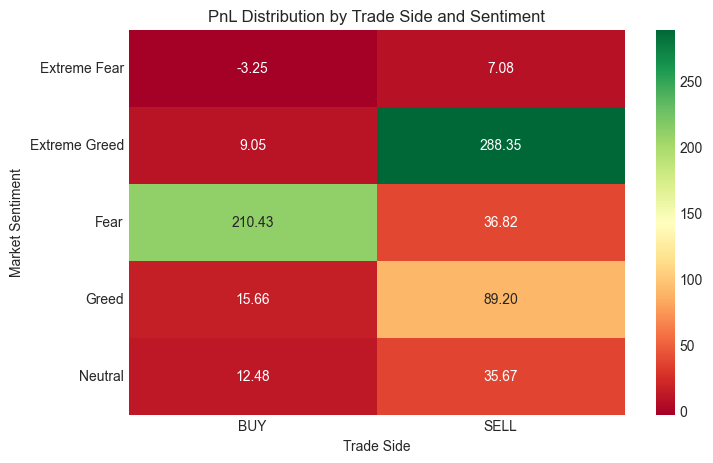

In [27]:
plt.figure(figsize=(8, 5))
sns.heatmap(
    merged_df.pivot_table(index="classification", columns="Side", values="Closed PnL", aggfunc="mean"),
    annot=True, fmt=".2f", cmap="RdYlGn"
)
plt.title("PnL Distribution by Trade Side and Sentiment")
plt.xlabel("Trade Side")
plt.ylabel("Market Sentiment")
plt.show()

In [6]:
# --- Save processed sentiment data ---

os.makedirs("../data/processed", exist_ok=True)
sentiment_df.to_csv("../data/processed/sentiment_analysis_ready.csv", index=False)
print("✅ Sentiment dataset saved for performance analysis.")

✅ Sentiment dataset saved for performance analysis.
